In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
beach=cv2.imread('beach.jpg',0)
cv2.imshow('beach',beach)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
beach.shape

(331, 520)

In [7]:
gauss_noise=np.zeros(beach.shape).astype(np.uint8)
cv2.randn(gauss_noise,130,20)
gauss_noise=(gauss_noise*0.5).astype(np.uint8)

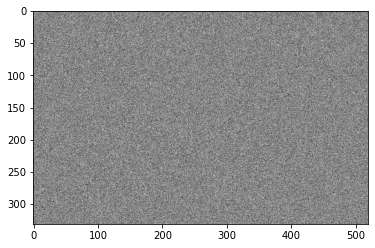

In [8]:
plt.imshow(gauss_noise,cmap='gray')

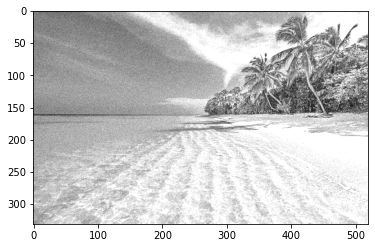

In [9]:
gn_img=cv2.add(gauss_noise,beach)
plt.imshow(gn_img,cmap='gray')

In [10]:
filter=np.ones([3,3],dtype=int)
filter=filter/9
print(filter)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [14]:
new_img=np.zeros(gn_img.shape)
for i in range (1,gn_img.shape[0]-1):
    for j in range (1,gn_img.shape[1]-1):
        new_img[i][j]=gn_img[i-1][j-1]*filter[0,0]+gn_img[i-1][j]*filter[0,1]+gn_img[i-1][j+1]*filter[0,2]+gn_img[i][j-1]*filter[1,0]+gn_img[i][j]*filter[1,1]+gn_img[i][j+1]*filter[1,2]+gn_img[i+1][j-1]*filter[2,0]+gn_img[i+1][j]*filter[2,1]+gn_img[i+1][j+1]*filter[2,2]
new_img=new_img.astype(np.uint8)

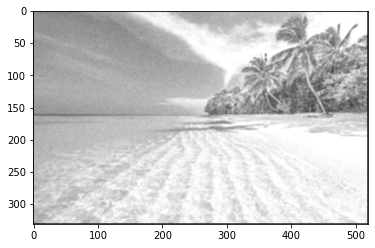

In [15]:
plt.imshow(new_img,cmap='gray')

In [16]:
noise_img=beach.copy()

In [21]:
import random
n=random.randint(noise_img.shape[0],noise_img.shape[1])
for i in range(0,n):
    row = random.randint(0, beach.shape[0]-1) 
    col = random.randint(0, beach.shape[1]-1) 
    tmp=np.random.randint(0,1)
    if(tmp==0):
        noise_img[row][col]=0
    else:
        noise_img[row][col]=255

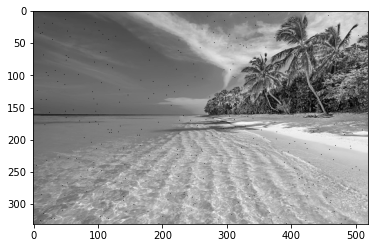

In [23]:
plt.imshow(noise_img,cmap='gray')

In [28]:
new_img2=np.zeros(noise_img.shape)
for i in range(1,noise_img.shape[0]-1):
    for j in range(1,noise_img.shape[1]-1):
        temp=[noise_img[i-1][j],
             noise_img[i][j],
             noise_img[i+1][j],
             noise_img[i-1][j-1],
             noise_img[i][j-1],
             noise_img[i+1][j-1],
             noise_img[i-1][j+1],
             noise_img[i][j+1],
             noise_img[i+1][j+1]]
        temp.sort()
        new_img2[i][j]=temp[4]
new_img2=new_img2.astype(np.uint8)

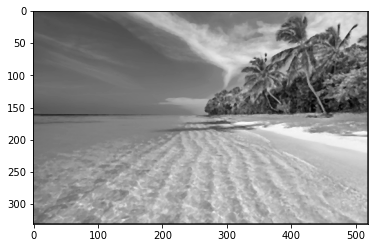

In [30]:
plt.imshow(new_img2,cmap='gray')